In [1]:
!gdown https://drive.google.com/uc?id=1LQXGTRB174vrRbcBKSqrGA_XReSbIm_1
!unzip template-matching.zip

Downloading...
From: https://drive.google.com/uc?id=1LQXGTRB174vrRbcBKSqrGA_XReSbIm_1
To: /content/template-matching.zip
100% 682k/682k [00:00<00:00, 10.8MB/s]
Archive:  template-matching.zip
replace template-matching/image1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: template-matching/image1.jpg  
  inflating: template-matching/image2.jpg  
  inflating: template-matching/image3.jpg  
  inflating: template-matching/image4.jpg  
  inflating: template-matching/image5.jpg  
  inflating: template-matching/image6.jpg  
  inflating: template-matching/image7.jpg  
  inflating: template-matching/image8.jpg  
  inflating: template-matching/imagenet1000_clsid_to_human.pkl  
  inflating: template-matching/template.jpg  
  inflating: template-matching/template_cat1.jpg  


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib import patches
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
PATH = '/content/template-matching/'
height = 800
width  = 1000
image = kimage.load_img(PATH + 'image8.jpg', target_size=(height, width))

side1 = 160
side2 = 360
template1 = kimage.load_img(PATH + 'template_cat1.jpg', target_size=(side1, side1))
template2 = kimage.load_img(PATH + 'template_cat1.jpg', target_size=(side2, side2))

In [38]:
image_d = np.expand_dims(image, axis=0)
template1_d = np.expand_dims(template1, axis=0)
template2_d = np.expand_dims(template2, axis=0)

model = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(None, None, 3))

image_feature = model.predict(image_d)
template_feature1 = model.predict(template1_d)
template_feature2 = model.predict(template2_d)

In [40]:
side1_fm = template_feature1.shape[1]
side2_fm = template_feature2.shape[1]
height_fm = image_feature.shape[1]
width_fm = image_feature.shape[2]

sim_data1 = []
for i in tqdm(range(height_fm - side1_fm + 1)):
    for j in range(width_fm - side1_fm + 1):
        patch = image_feature[0, i:i+side1_fm, j:j+side1_fm, :]
        sim = cosine_similarity(patch.reshape(1, -1), template_feature1.reshape(1, -1))
        sim_data1.append((sim[0][0], i, j))
sim_sorted1 = sorted(sim_data1, reverse=True)

sim_data2 = []
for i in tqdm(range(height_fm - side2_fm + 1)):
    for j in range(width_fm - side2_fm + 1):
        patch = image_feature[0, i:i+side2_fm, j:j+side2_fm, :]
        sim = cosine_similarity(patch.reshape(1, -1), template_feature2.reshape(1, -1))
        sim_data2.append((sim[0][0], i, j))
sim_sorted2 = sorted(sim_data2, reverse=True)

100%|██████████| 15/15 [00:00<00:00, 84.58it/s]


<Figure size 1152x1152 with 0 Axes>

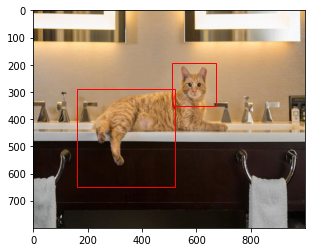

In [43]:
img = kimage.load_img(PATH + 'image8.jpg', target_size=(height, width))

plt.figure(figsize=(16, 16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Scale
scale_height = height // height_fm
scale_width  = width // width_fm

# Create a Rectangle patch
for i in range(1):
  rect = patches.Rectangle((sim_sorted1[i][2] * scale_width, sim_sorted1[i][1] * scale_height), 
                           side1, side1, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
  rect = patches.Rectangle((sim_sorted2[i][2] * scale_width, sim_sorted2[i][1] * scale_height), 
                           side2, side2, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
plt.show()